In this dataset we are particularly predicting whether the person should be applicable for loan or not; based on different attributes we are predicting the target in the dataset ,so generally it is a type of logistic regression problem

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('loanpred.csv',names=range(0,13),header=0)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Performing EDA process

In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

0      object
1      object
2      object
3     float64
4      object
5      object
6       int64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
dtype: object

In [7]:
df.isnull().sum()

0      0
1     13
2      3
3     15
4      0
5     32
6      0
7      0
8     22
9     14
10    50
11     0
12     0
dtype: int64

In [8]:
df.drop(0,axis=1,inplace=True)

In [9]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       601 non-null    object 
 1   2       611 non-null    object 
 2   3       599 non-null    float64
 3   4       614 non-null    object 
 4   5       582 non-null    object 
 5   6       614 non-null    int64  
 6   7       614 non-null    float64
 7   8       592 non-null    float64
 8   9       600 non-null    float64
 9   10      564 non-null    float64
 10  11      614 non-null    object 
 11  12      614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

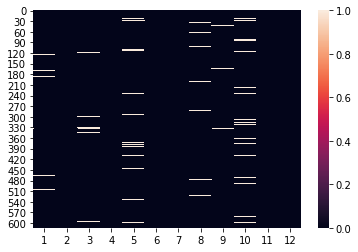

In [12]:
sns.heatmap(df.isnull())

In [13]:
#we can infer from the above that dataset contains null value

In [14]:
#removing null values from the dataset

In [15]:
a=[1,2,3,5,9,10]

In [16]:
for i in a:
    mode = df[i].mode().values[0]
    df[i].fillna(value=mode,inplace=True)

In [17]:
mode = df[1].mode().values[0]
df[1].fillna(value=mode,inplace=True)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [18]:
df[8]=df[8].replace(np.NaN,df[8].mean())

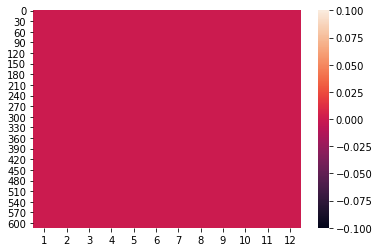

In [19]:
sns.heatmap(df.isnull())

In [20]:
#converting catagorical to numerical values

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
a=[1,2,4,5,11,12]

In [23]:
for i in a:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].astype(str))

In [24]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [25]:
df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [26]:
#so finally we have removed the null values and converted cat values to num values

In [27]:
#seperating the data in x and y

In [28]:
x=df.drop(12,axis=1)

In [29]:
x.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [30]:
y=df[12].values
y=y.reshape(-1,1)

In [31]:
y.shape

(614, 1)

In [32]:
x.shape

(614, 11)

In [33]:
x.skew()

1    -1.648795
2    -0.644850
3     1.456965
4     1.367622
5     2.159796
6     6.539513
7     7.491531
8     2.726601
9    -2.402112
10   -2.021971
11   -0.066196
dtype: float64

In [34]:
x.describe()

,1,2,3,4,5,6,7,8,9,10,11
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.827362,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [35]:
#data visualization

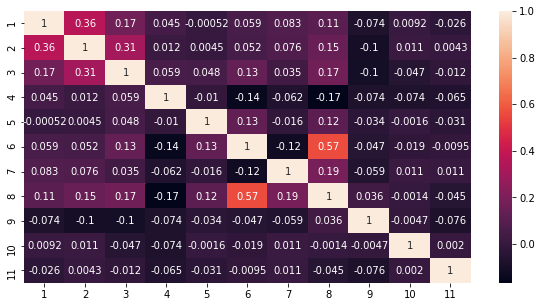

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True)

#so from the below graph we can interpret that most of the values are not correlated amongst each other

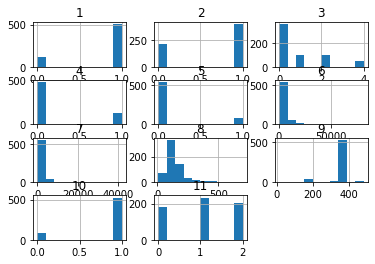

In [37]:
%matplotlib inline
x.hist()
plt.show()

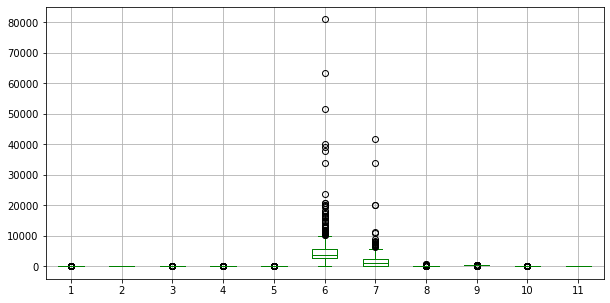

In [38]:
x.boxplot(figsize=(10,5),color='green')      #shows outliers

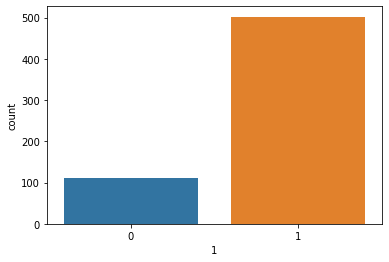

In [39]:
sns.countplot(df[1])  #count of male and female

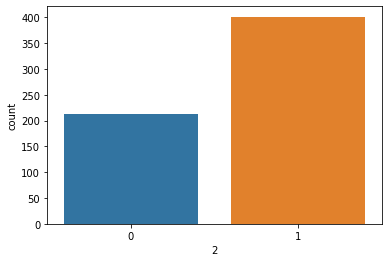

In [40]:
sns.countplot(df[2])   #count of married and unmarried

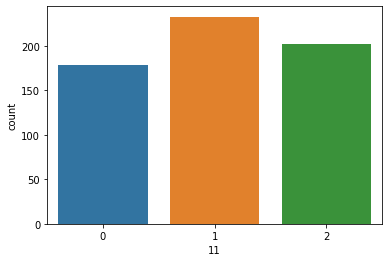

In [41]:
sns.countplot(df[11])          # count of people having property in urban, rural and semiurban place

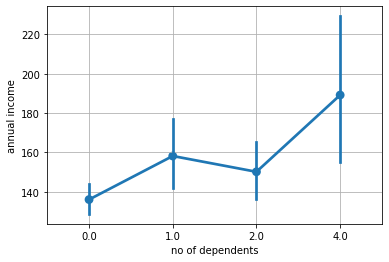

In [42]:
sns.pointplot(x[3],x[8])
plt.xlabel('no of dependents')
plt.ylabel('annual income')
plt.grid()

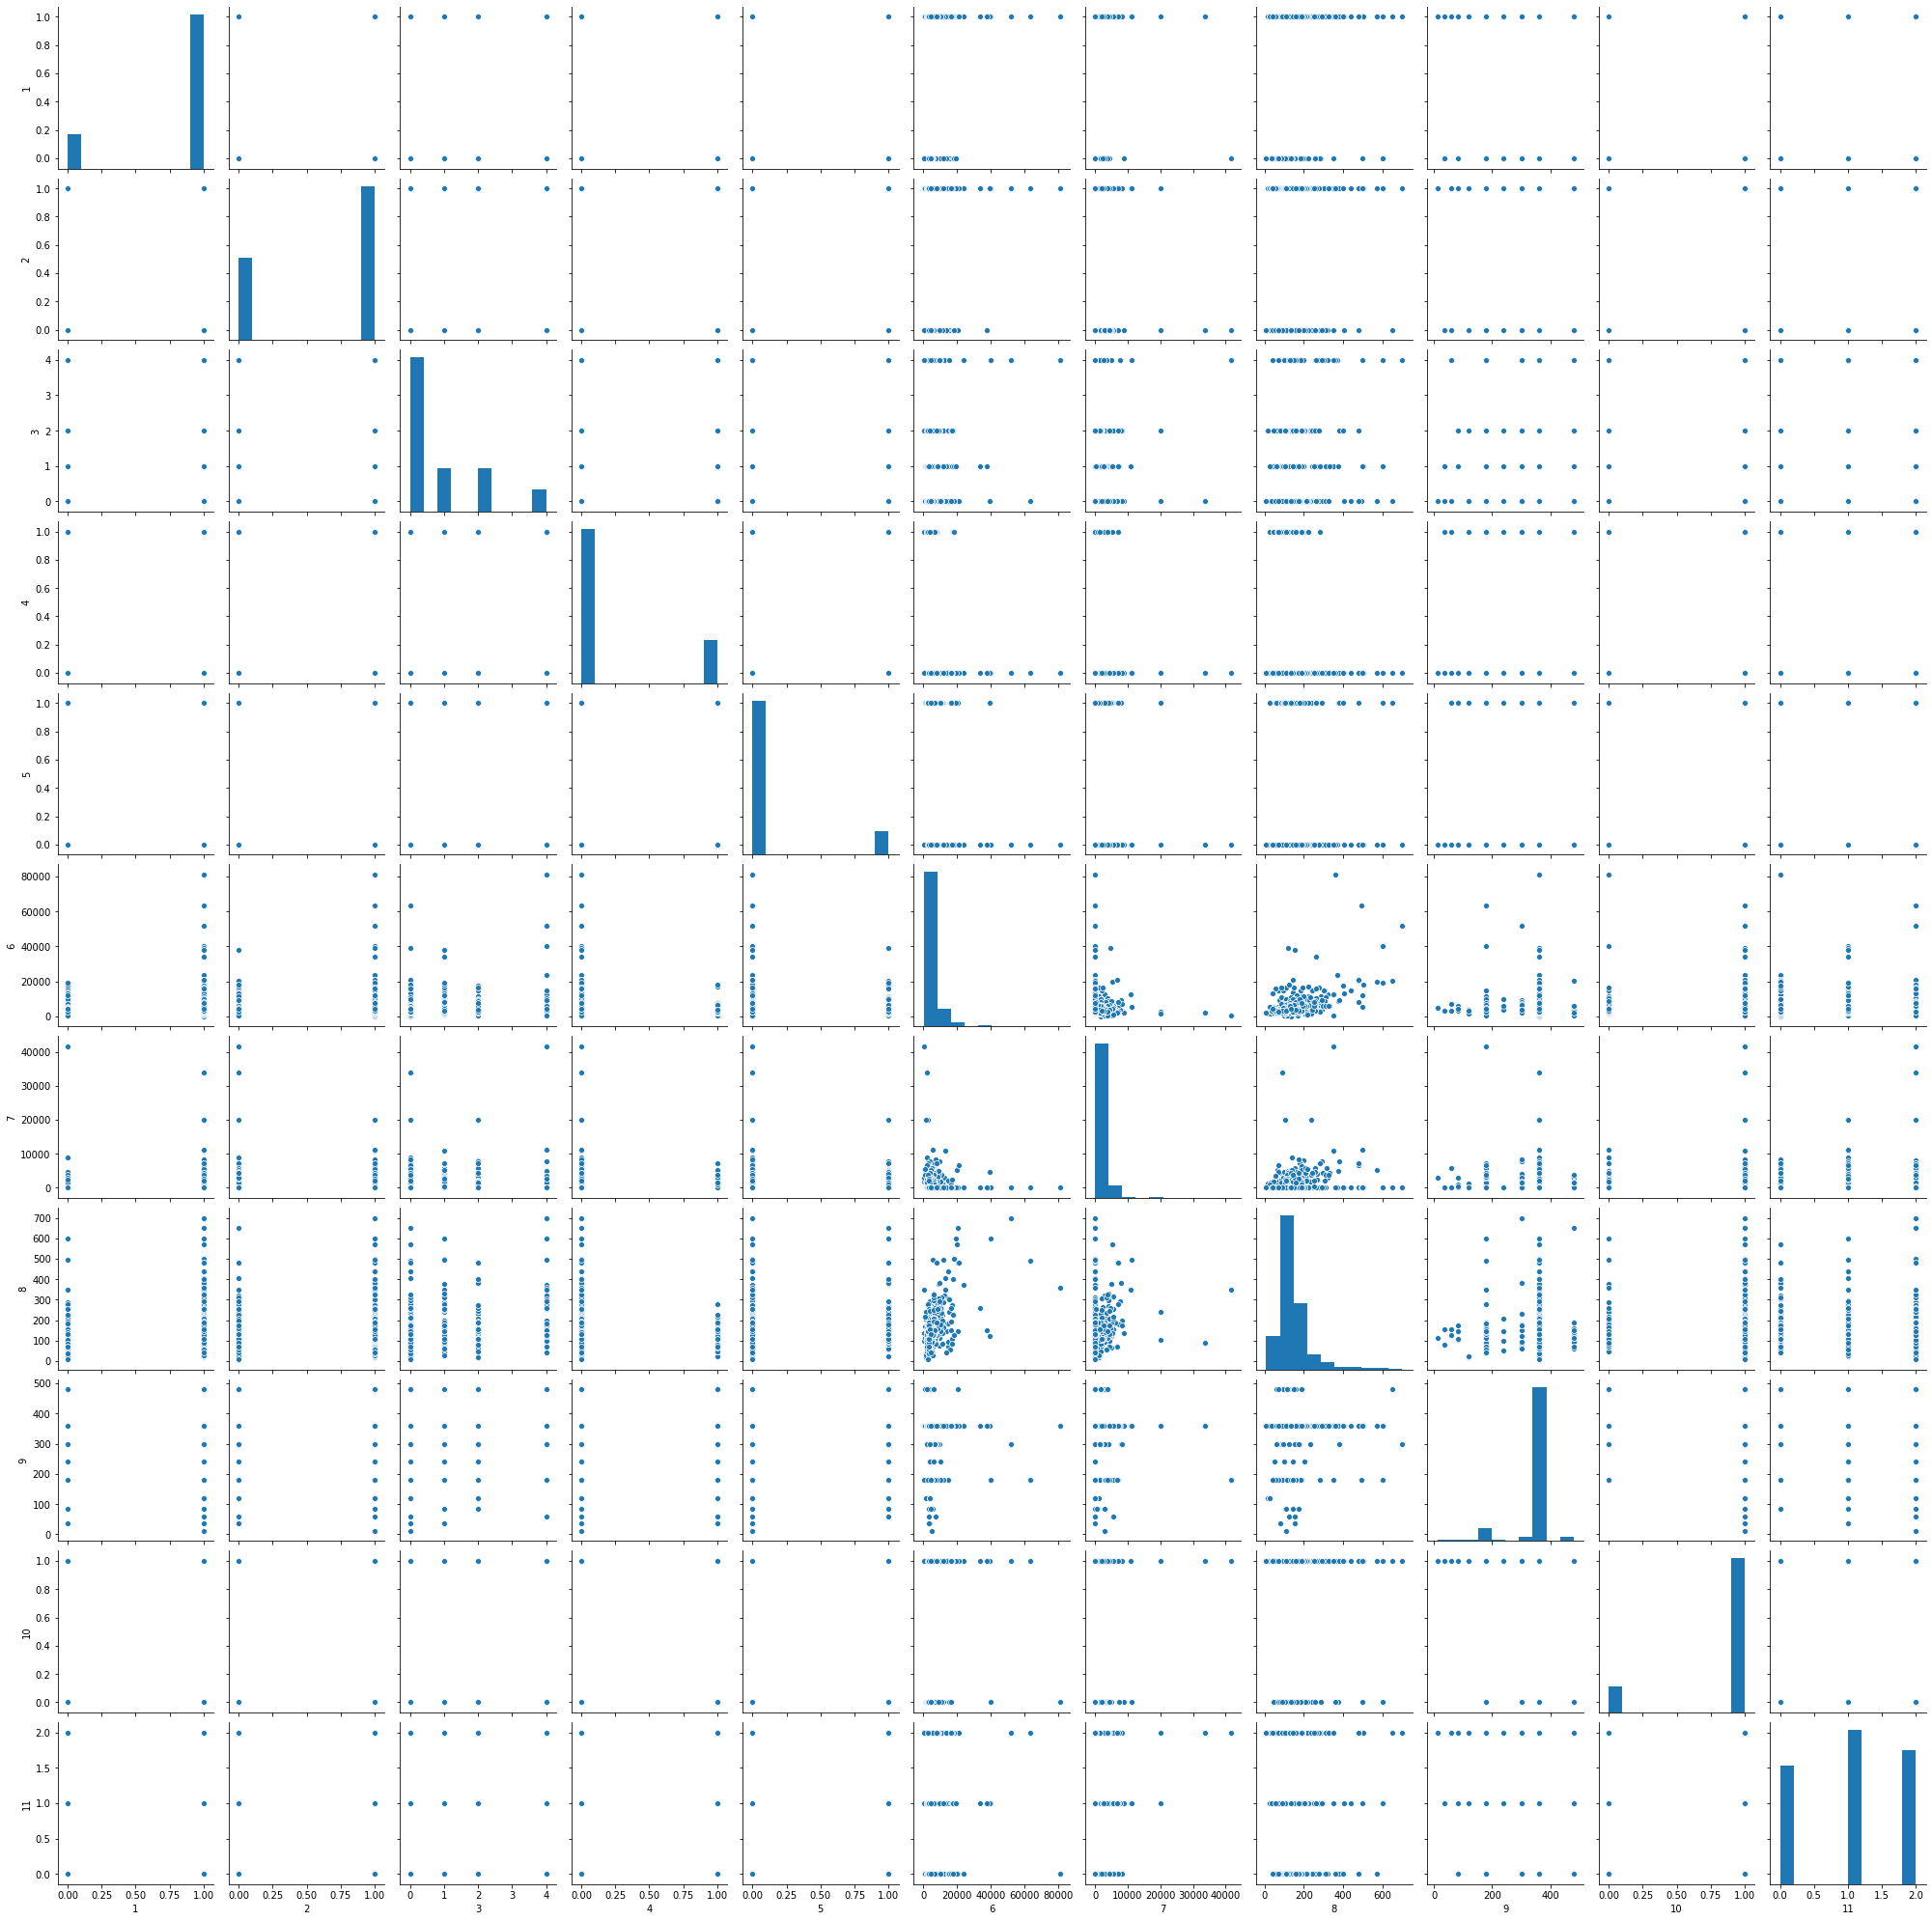

In [43]:
sns.pairplot(x)

In [44]:
#removing outliers

In [45]:
from scipy.stats import zscore

In [46]:
z=(np.abs(zscore(x)))

In [47]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [48]:
x_new=x[(z<3).all(axis=1)]

In [49]:
x_new.shape

(577, 11)

In [50]:
x.shape

(614, 11)

In [51]:
#so we can see from the above that outliers with threshold as 3 has been removed

performing the satndardization will bring mean to 0 and standard deviation,variance to unit

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std=StandardScaler()

In [54]:
x=std.fit_transform(x)

In [55]:
x=pd.DataFrame(data=x)

In [56]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.142459,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.682729,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.682729,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.682729,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.273231,0.411733,1.223298


In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       614 non-null    float64
 1   1       614 non-null    float64
 2   2       614 non-null    float64
 3   3       614 non-null    float64
 4   4       614 non-null    float64
 5   5       614 non-null    float64
 6   6       614 non-null    float64
 7   7       614 non-null    float64
 8   8       614 non-null    float64
 9   9       614 non-null    float64
 10  10      614 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


In [58]:
x.skew()

0    -1.648795
1    -0.644850
2     1.456965
3     1.367622
4     2.159796
5     6.539513
6     7.491531
7     2.726601
8    -2.402112
9    -2.021971
10   -0.066196
dtype: float64

In [59]:
#reomoving skewness from the dataset

In [60]:
x[2]=np.log1p(x[2])
x[2].skew()

0.6461954664065721

In [61]:
x[3]=np.log1p(x[3])
x[3].skew()

1.3676220101641774

In [62]:
x[4]=np.log1p(x[4])
x[4].skew()

2.159796196971883

In [63]:
x[5]=np.log1p(x[5])
x[5].skew()

1.1737998695704424

In [64]:
x[6]=np.log1p(x[6])
x[6].skew()

0.7635820146948498

In [65]:
#performing analysis with various models

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [67]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.7886178861788617
accuracy score corrosponding to random state: 43 is: 0.8048780487804879
accuracy score corrosponding to random state: 44 is: 0.8455284552845529
accuracy score corrosponding to random state: 45 is: 0.7723577235772358
accuracy score corrosponding to random state: 46 is: 0.8292682926829268
accuracy score corrosponding to random state: 47 is: 0.8048780487804879
accuracy score corrosponding to random state: 48 is: 0.7642276422764228
accuracy score corrosponding to random state: 49 is: 0.8211382113821138
accuracy score corrosponding to random state: 50 is: 0.7886178861788617
accuracy score corrosponding to random state: 51 is: 0.8292682926829268
accuracy score corrosponding to random state: 52 is: 0.8211382113821138
accuracy score corrosponding to random state: 53 is: 0.7723577235772358
accuracy score corrosponding to random state: 54 is: 0.8373983739837398
accuracy score corrosponding to random state: 55 is: 0.731707317

In [68]:
#so from the above model we came to the conclusion that logistic regressor is giving 88% accuracy result.
#will check with some other models also

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.20)

In [70]:
a=['linear','rbf','poly']
for i in a:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    pred1=svc.predict(x_test)
    print("accuracy score for kernel",i,"is:",accuracy_score(pred1,y_test))

score=cross_val_score(svc,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for kernel linear is: 0.8780487804878049
accuracy score for kernel rbf is: 0.8780487804878049
accuracy score for kernel poly is: 0.8699186991869918
cross val score is: 0.7980407836865253


In [71]:
#using hyper parameter for SVC

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
attr={'kernel':['poly','linear','rbf'],'C':[1,0,10]}

In [74]:
gd=GridSearchCV(estimator=SVC(),param_grid=attr)

In [75]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0, 10], 'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [78]:
gd.best_score_

0.8110888977742234

In [79]:
#we can see from the above that SVC is giving 88% of accuracy score with kernel as 'rbf'

In [80]:
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    print("accuracy score for neighbors",i,"is:",accuracy_score(pred2,y_test))
    
score=cross_val_score(knn,x,y,cv=5).mean()
print("cross val score is:",score)

accuracy score for neighbors 1 is: 0.7967479674796748
accuracy score for neighbors 2 is: 0.6910569105691057
accuracy score for neighbors 3 is: 0.8373983739837398
accuracy score for neighbors 4 is: 0.7642276422764228
accuracy score for neighbors 5 is: 0.8292682926829268
accuracy score for neighbors 6 is: 0.8048780487804879
accuracy score for neighbors 7 is: 0.8130081300813008
accuracy score for neighbors 8 is: 0.8048780487804879
accuracy score for neighbors 9 is: 0.8617886178861789
accuracy score for neighbors 10 is: 0.8373983739837398
accuracy score for neighbors 11 is: 0.8536585365853658
accuracy score for neighbors 12 is: 0.8536585365853658
accuracy score for neighbors 13 is: 0.8536585365853658
accuracy score for neighbors 14 is: 0.8455284552845529
accuracy score for neighbors 15 is: 0.8699186991869918
accuracy score for neighbors 16 is: 0.8536585365853658
accuracy score for neighbors 17 is: 0.8699186991869918
accuracy score for neighbors 18 is: 0.8699186991869918
accuracy score for 

In [81]:
#from the above we can conclude that knn is giving 87% accuracy with n_neighbors=15

In [82]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    print("accuracy score with criterion as",i,"is:",accuracy_score(y_test,preddtc))

accuracy score with criterion as gini is: 0.7154471544715447
accuracy score with criterion as entropy is: 0.7886178861788617


In [83]:
#will use ensembiling techniques to boost the result

In [84]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [85]:
a=[150,200,250,300,350]
for i in a:
    rd=RandomForestClassifier(n_estimators=i)
    rd.fit(x_train,y_train)
    predrd=rd.predict(x_test)
    print('accuracy score at',i,'is:',accuracy_score(y_test,predrd))

accuracy score at 150 is: 0.8617886178861789
accuracy score at 200 is: 0.8617886178861789
accuracy score at 250 is: 0.8455284552845529
accuracy score at 300 is: 0.8536585365853658
accuracy score at 350 is: 0.8617886178861789


In [86]:
l=[0.1,0.01,1.0]
for i in l:
    gd=GradientBoostingClassifier(learning_rate=i)
    gd.fit(x_train,y_train)
    predgd=gd.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predgd))

accuracy score at 0.1 is: 0.8373983739837398
accuracy score at 0.01 is: 0.8699186991869918
accuracy score at 1.0 is: 0.8048780487804879


In [109]:
a=[100,200,50,150]
for i in a:
    ad=AdaBoostClassifier(base_estimator=dtc,n_estimators=i)
    ad.fit(x_train,y_train)
    predad=ad.predict(x_test)
    print("accuracy score at",i,"is:",accuracy_score(y_test,predad))
    

accuracy score at 100 is: 0.7642276422764228
accuracy score at 200 is: 0.7804878048780488
accuracy score at 50 is: 0.7804878048780488
accuracy score at 150 is: 0.7804878048780488


so from the above we can conclude from the above that SVC with kernel as 'linear' and 'rbf' is giving the same result as that with logistic regression model(88% acuuracy score), so we can make use of any of the above model for prediction

In [88]:
#finalizing the model

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.20)

In [90]:
lg=LogisticRegression()

In [91]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
predlg=lg.predict(x_test)

In [93]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        35
           1       0.85      1.00      0.92        88

    accuracy                           0.88       123
   macro avg       0.93      0.79      0.82       123
weighted avg       0.90      0.88      0.87       123



In [94]:
print(accuracy_score(y_test,predlg))

0.8780487804878049


In [95]:
print(confusion_matrix(y_test,predlg))   #shows there is a type 1 error with 15 results predicted wrongly

[[20 15]
 [ 0 88]]


In [96]:
a=pd.DataFrame(data=predlg)
a.to_csv('fraud loan prediction.csv')  #saving the final result

In [97]:
score=cross_val_score(lg,x,y,cv=5)   #using cross val score

In [98]:
score

array([0.81300813, 0.77235772, 0.7804878 , 0.85365854, 0.81147541])

In [99]:
#plotting auc roc curve

In [100]:
from sklearn.metrics import roc_auc_score,roc_curve

In [101]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [102]:
y_pred_prob

array([0.6904622 , 0.84322348, 0.67418113, 0.86305255, 0.12205208,
       0.80160837, 0.61388722, 0.88437561, 0.80366811, 0.83119284,
       0.13277302, 0.58736037, 0.82386146, 0.57845123, 0.16426109,
       0.829312  , 0.82363309, 0.77687359, 0.82083857, 0.81994271,
       0.77328725, 0.15979097, 0.73867914, 0.68956276, 0.66472006,
       0.68513332, 0.79887362, 0.6843936 , 0.73316902, 0.88563616,
       0.82548948, 0.81214936, 0.80449468, 0.83802795, 0.63163264,
       0.81962564, 0.88799676, 0.85183589, 0.80845571, 0.83562832,
       0.79566361, 0.56054155, 0.83594265, 0.66597443, 0.75914247,
       0.69577448, 0.85867196, 0.60362324, 0.82025265, 0.55797425,
       0.82205928, 0.14804323, 0.70016689, 0.85908118, 0.74342057,
       0.80454571, 0.72578323, 0.85143787, 0.87771116, 0.14001535,
       0.81006437, 0.82610107, 0.5444159 , 0.83151105, 0.08544769,
       0.55300942, 0.08614828, 0.66267154, 0.13614638, 0.54432522,
       0.88860451, 0.79896478, 0.82475116, 0.10722527, 0.80090

In [103]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [104]:
print("fpr is:",fpr)
print("tpr is:",tpr)
print("threshold is:",threshold)

fpr is: [0.         0.         0.         0.02857143 0.02857143 0.05714286
 0.05714286 0.08571429 0.08571429 0.11428571 0.11428571 0.17142857
 0.17142857 0.2        0.2        0.25714286 0.25714286 0.31428571
 0.31428571 0.34285714 0.34285714 0.37142857 0.37142857 0.4
 0.4        0.42857143 0.42857143 1.        ]
tpr is: [0.         0.01136364 0.10227273 0.10227273 0.27272727 0.27272727
 0.31818182 0.31818182 0.43181818 0.43181818 0.45454545 0.45454545
 0.5        0.5        0.65909091 0.65909091 0.67045455 0.67045455
 0.70454545 0.70454545 0.77272727 0.77272727 0.82954545 0.82954545
 0.875      0.875      1.         1.        ]
threshold is: [1.88860451 0.88860451 0.85908118 0.85867196 0.82386146 0.82363309
 0.82083857 0.82025265 0.80749546 0.807192   0.80449468 0.80160837
 0.79826791 0.79566361 0.74998084 0.74342057 0.74276216 0.73316902
 0.70463187 0.70408581 0.68956276 0.68513332 0.66947943 0.66597443
 0.63163264 0.62480075 0.54432522 0.06938201]


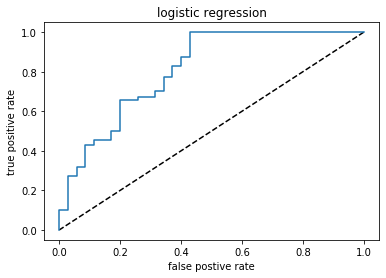

In [105]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='Decision Tree')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("logistic regression")
plt.show()

In [106]:
#saving the final model

In [107]:
import joblib

In [108]:
joblib.dump(lg,'loan_pred.obj')

['loan_pred.obj']